In [6]:
from utils import get_new_dataframe

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [7]:
#Récupérer le jeu de données sous forme de DataFrame
df = get_new_dataframe()
df

,text,label,src
0,Little disclaimer: this deals with US laws and...,1,cmv_human
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human
3,"I believe in a flat tax system, where everyone...",1,cmv_human
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human
...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human


In [8]:
#Tokenisation des données (en utilisant celui de ChatGPT 4)
def gpt_tokenize(doc):
    enc = tiktoken.encoding_for_model("gpt-4")
    tokens = enc.encode(doc)
    return [str(token) for token in tokens]

In [9]:
#Séparation du jeu de données:
# - X_train => les données sur lesquelles le modèle va s'entraîner
# - y_train => les sorties attendues pour chaque entrée (de X_train)
# - X_test => les données sur lesquelles les performances du modèle vont être testées
# - y_test => les sorties attendues pour chaque entrée (de X_test)
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=69)

#Création du modèle de Machine Learning
#En utilisant les Stop Words
model = make_pipeline(CountVectorizer(tokenizer=gpt_tokenize, lowercase=True, stop_words=['to', 'and', 'the', 'in']), RandomForestClassifier(max_depth=100,random_state=0))

#Entraînement du modèle
model.fit(X_train, y_train)

#Étude des performances du modèle sur des données jamais vues
y_pred_test = model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))

/opt/mamba/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['1820', '258', '438', '998'] not in stop_words.
  warnings.warn(


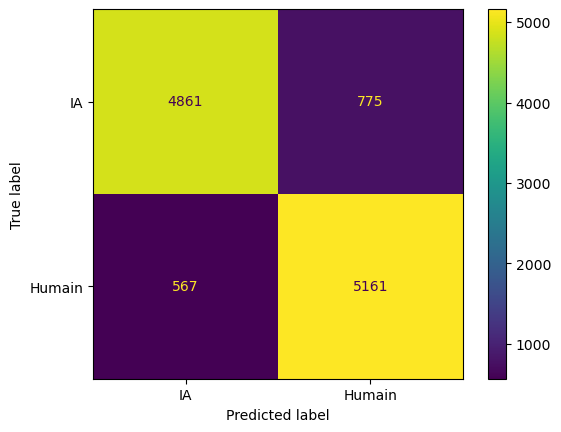

In [ ]:
#Seconde étude des performances du modèle en utilisant une matrice de confusion
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["IA", "Humain"])
disp.plot()
plt.show()